<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [3]:
# Your code to import matplotlib, pandas and numpy libraries

#
#
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

_______________________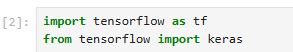

__________________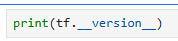

In [4]:
print(tf.__version__)

2.10.1


____________________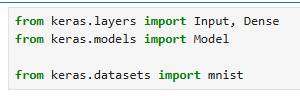

In [5]:
from keras.layers import Dense, Input
from keras.models import Model

from keras.datasets import mnist

In [6]:
# Your code to load MNIST data and store it in variables x_train, x_test. 
# Note -  we do not need labels as it's autoencoder.


# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")




Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


______________________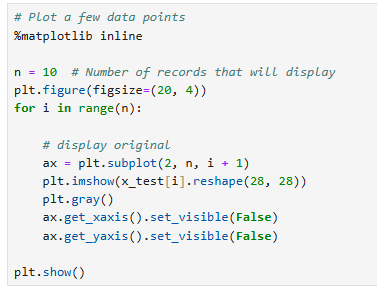

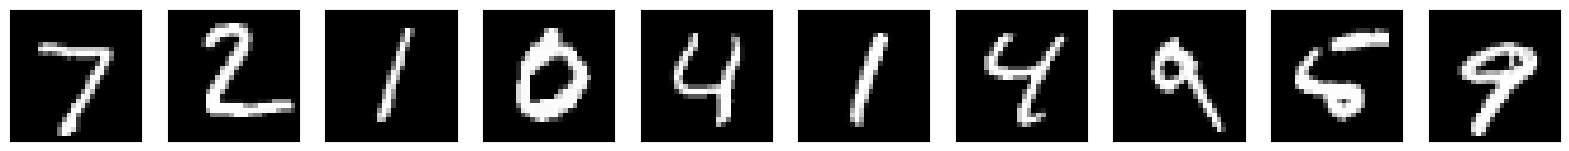

In [7]:
%matplotlib inline
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2, n, i+ 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
# Your code to
# normalise train data - Divided by 255

#

# normalise test data - Divided by 255

#
X_train = x_train / 255.0
X_test = x_test / 255.0

<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning. 


________________________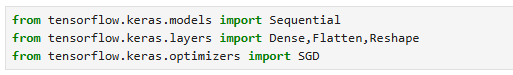

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape, BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD

In [10]:
encoder = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation="relu"),
])

C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Your code to print your Encoder model

#
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [ ]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
decoder = Sequential([
    Dense(128, activation="relu", input_shape=[64]),
    BatchNormalization(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(28 * 28, activation="sigmoid"),  # Sigmoid to output normalized pixel values
    Reshape([28, 28])
])


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Your code to print the Decoder model

#
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [ ]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


____________________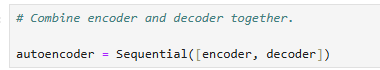

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
# Your code to print the Autoencoder model

#
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                243648    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            244368    
                                                                 
Total params: 488,016
Trainable params: 486,480
Non-trainable params: 1,536
_________________________________________________________________


In [ ]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
#SGD?
optimizer = SGD(learning_rate=0.1, decay=0)

In [47]:
# Your code to compile the Autoencoder. 
# Use binary_crossenropy as loss and metrics as accuracy.

#
autoencoder.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

___________________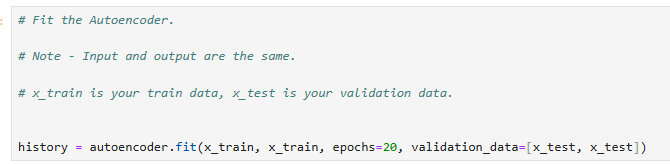

In [48]:
history = autoencoder.fit(X_train, X_train, epochs=20, validation_data=[X_test, X_test])

Epoch 1/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2456 - accuracy: 0.1487 - val_loss: 0.2026 - val_accuracy: 0.1670
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2006 - accuracy: 0.1596 - val_loss: 0.1820 - val_accuracy: 0.1768
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1870 - accuracy: 0.1686 - val_loss: 0.1711 - val_accuracy: 0.1844
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1789 - accuracy: 0.1744 - val_loss: 0.1640 - val_accuracy: 0.1906
Epoch 5/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1731 - accuracy: 0.1800 - val_loss: 0.1584 - val_accuracy: 0.1962
Epoch 6/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1687 - accuracy: 0.1843 - val_loss: 0.1539 - val_accuracy: 0.1996
Epoch 7/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1648 - accuracy: 0.1883 - val_loss: 0.1499 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.1292 - loss: 0.2204 - val_accuracy: 0.2148 - val_loss: 0.1363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2276 - loss: 0.1322 - val_accuracy: 0.2359 - val_loss: 0.1228
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2437 - loss: 0.1210 - val_accuracy: 0.2509 - val_loss: 0.1165
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2539 - loss: 0.1154 - val_accuracy: 0.2514 - val_loss: 0.1127
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2595 - loss: 0.1113 - val_accuracy: 0.2601 - val_loss: 0.1081
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2673 - loss: 0.1067 - val_accuracy: 0.2640 - val_loss: 0.1048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2730 - loss: 0.1036 - val_accuracy: 0.2721 - val_loss: 0.1020
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2760 -

____________________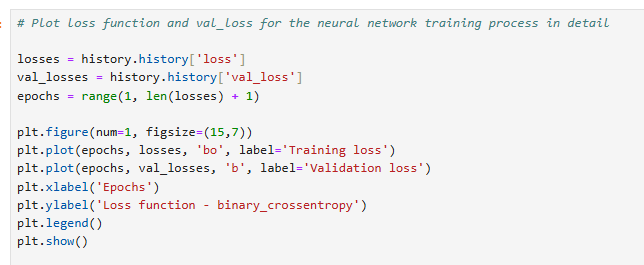

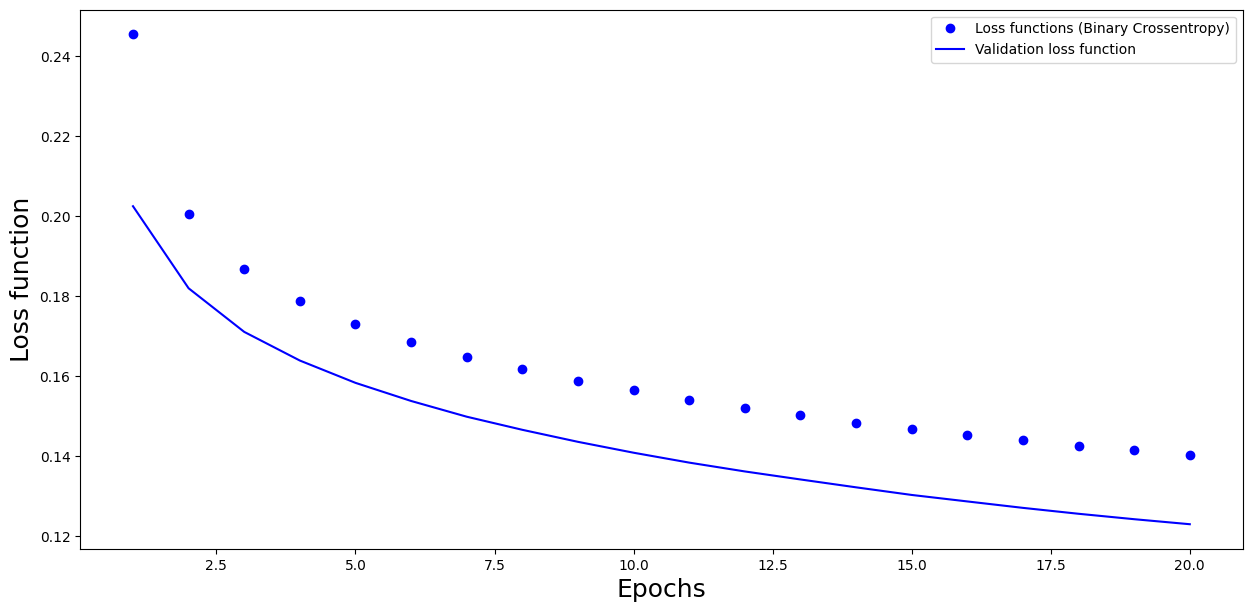

In [49]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, loss, 'bo', label='Loss functions (Binary Crossentropy)')
plt.plot(epochs, val_loss, 'b', markeredgecolor='red', markerfacecolor='yellow', label='Validation loss function')
plt.xlabel('Epochs', size= 18)
plt.ylabel('Loss function', size=18)
plt.legend()

plt.show()

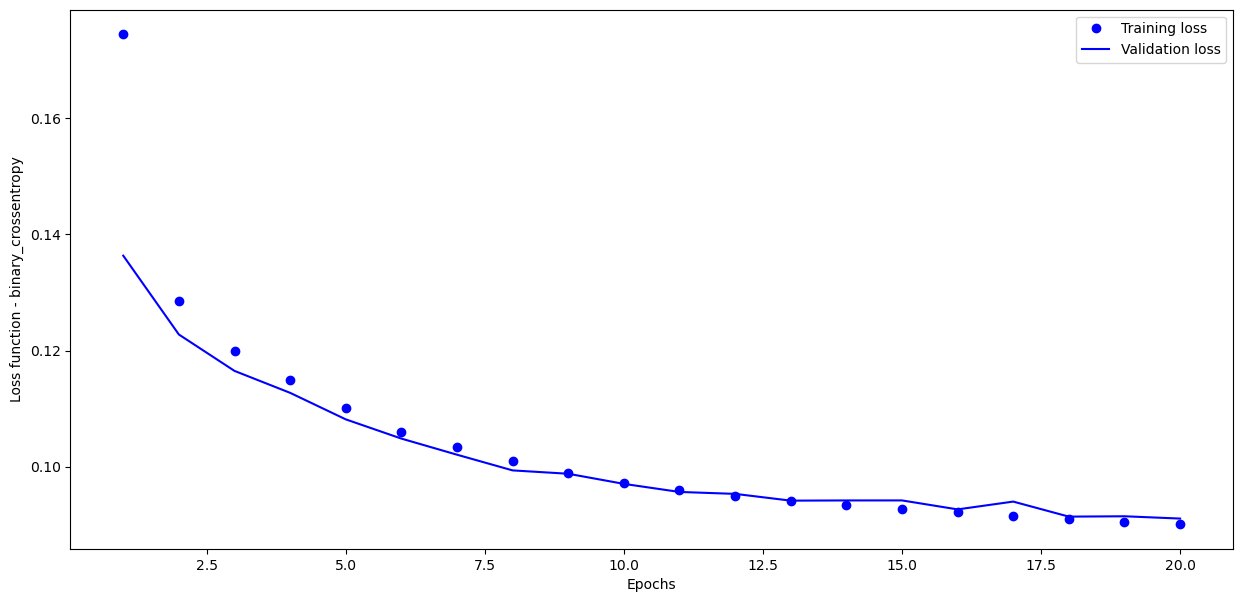

___________________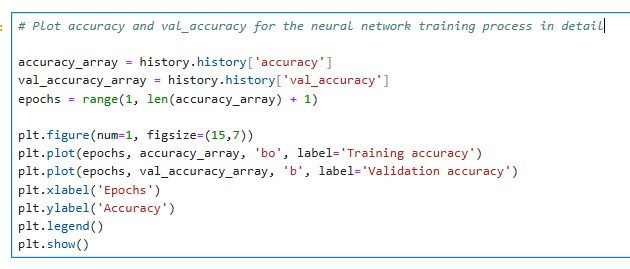

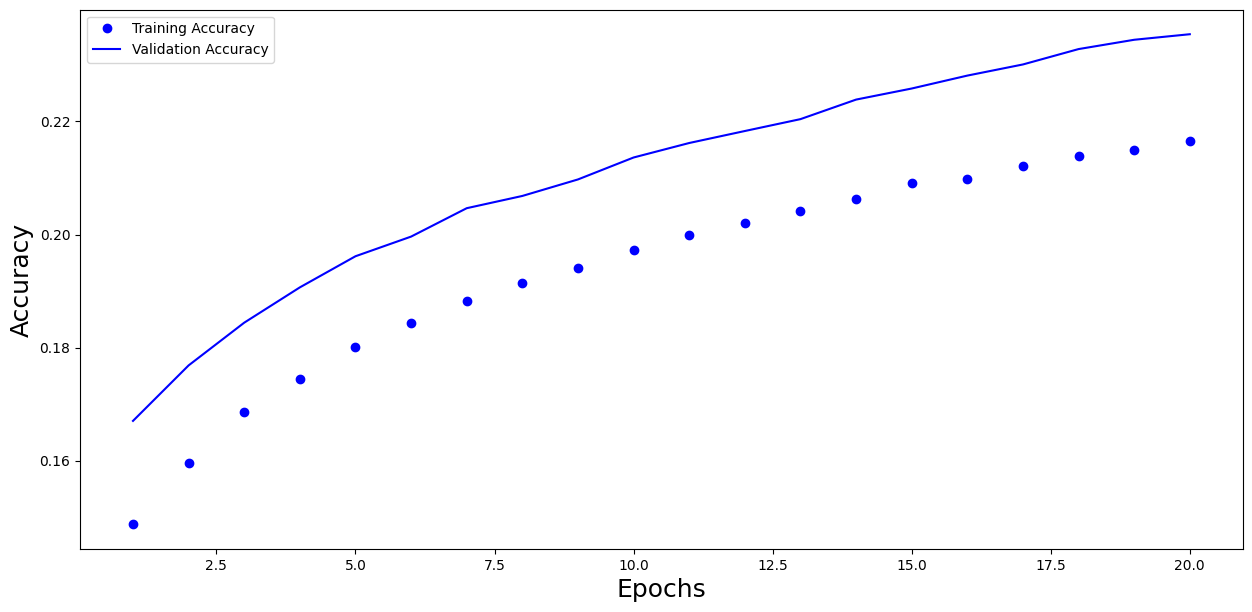

In [50]:
acc_values = history_dict['accuracy'][:]
val_acc_values = history_dict['val_accuracy'][:]
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', markeredgecolor='green', markerfacecolor='yellow', label='Validation Accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()

plt.show()

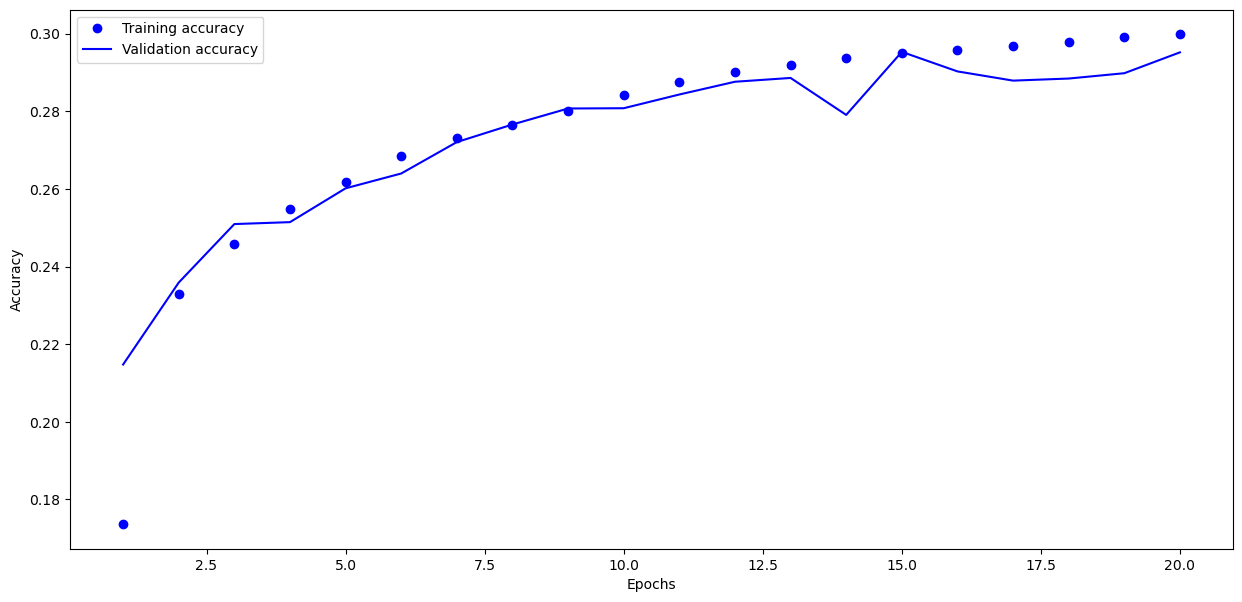

_______________________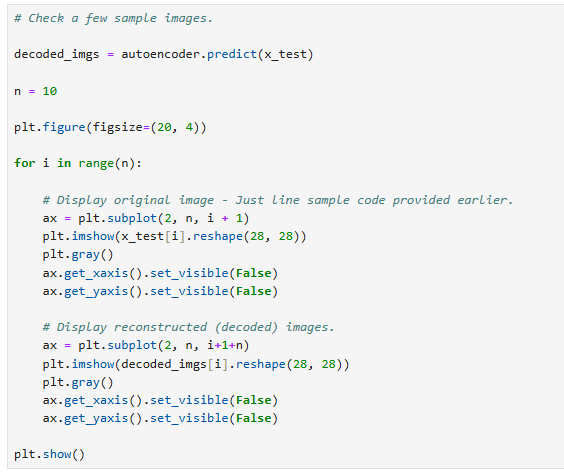

313/313 [==============================] - 2s 5ms/step


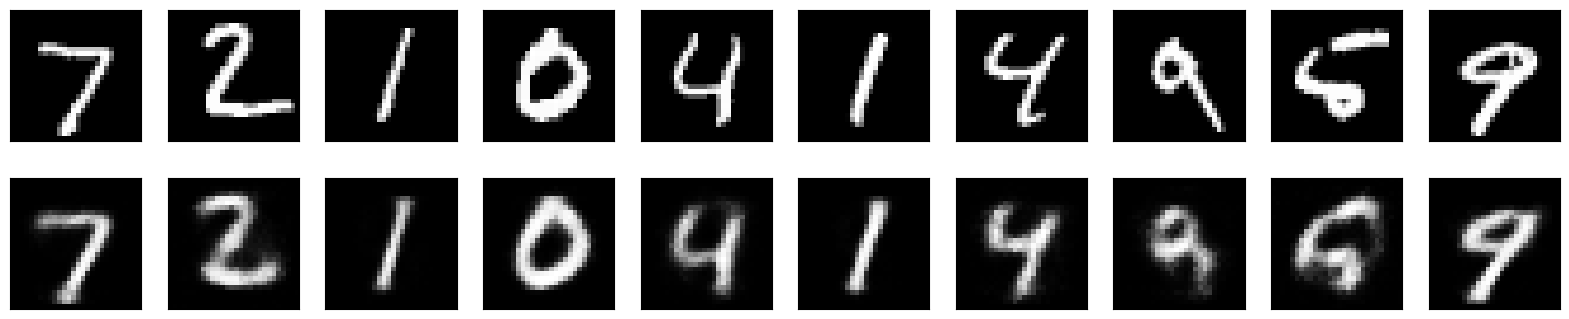

In [51]:
decoded_imgs = autoencoder.predict(X_test)
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax=plt.subplot(2, n, i+ 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2, n, i+ 1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


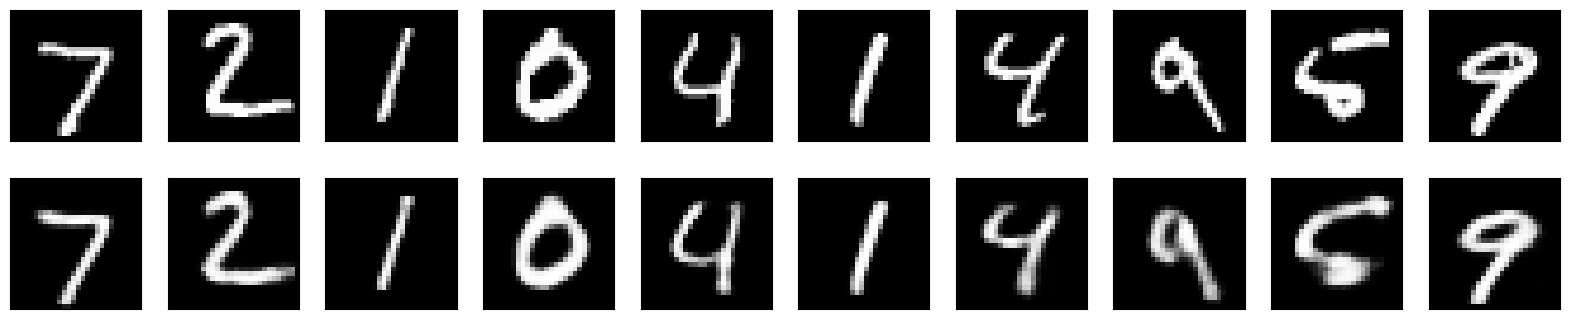

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 


______________________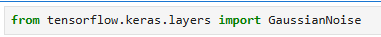

In [52]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
#GaussianNoise?

___________________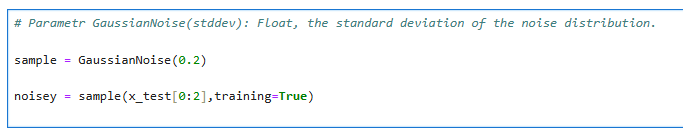

In [53]:
sample = GaussianNoise(0.2)
noisey = sample(X_test[0:2], training=True)

In [ ]:
# Plot the original and noisy images


_______________________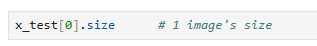

In [54]:
X_test[0].size

784

784

____________________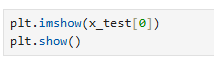

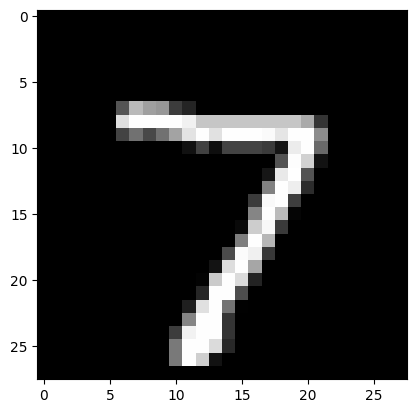

In [55]:
plt.imshow(X_test[0])
plt.show()

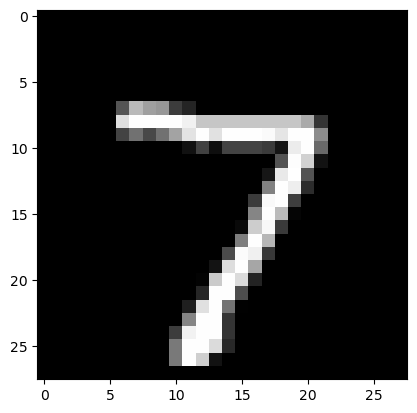

_____________________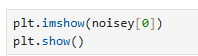

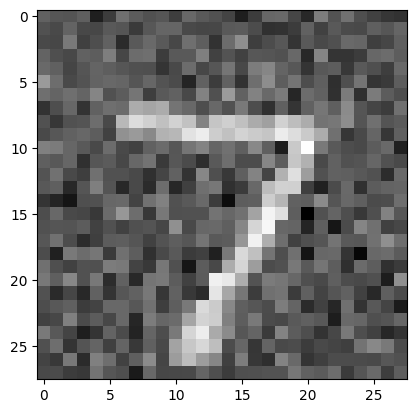

In [56]:
plt.imshow(noisey[0])
plt.show()

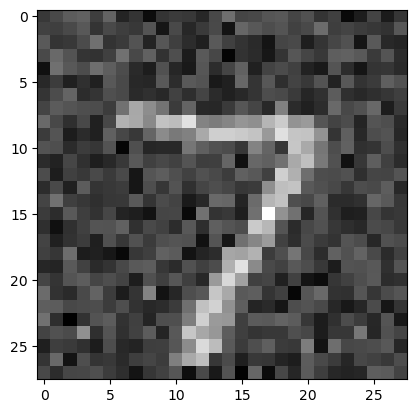

_________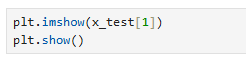

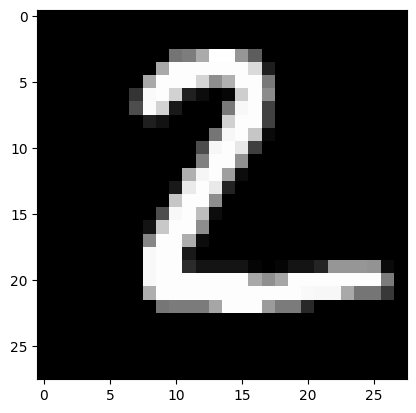

In [57]:
plt.imshow(X_test[1])
plt.show()

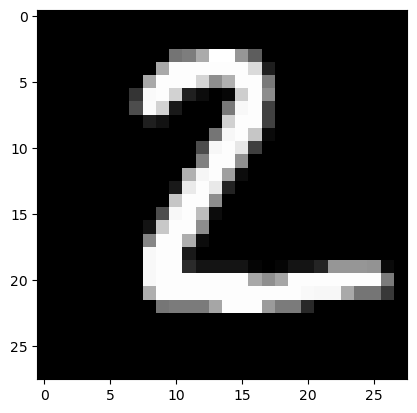

______________________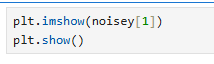

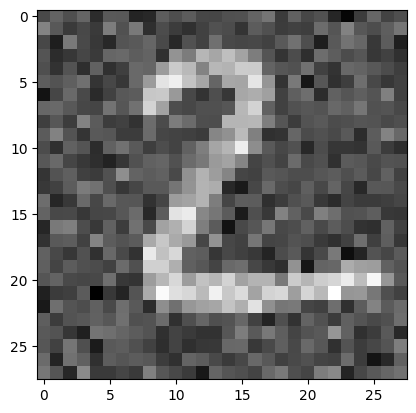

In [58]:
plt.imshow(noisey[1])
plt.show()

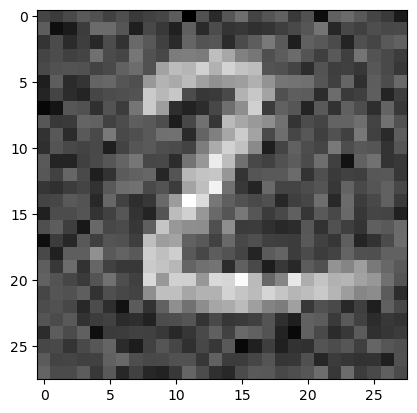

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network. 
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [59]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

# Add layers of Encoder network. You could use the same number of layers as you created earlier

encoder.add(Dense(256, activation="relu"))
encoder.add(BatchNormalization())
encoder.add(Dropout(0.2))
encoder.add(Dense(128, activation="relu"))
encoder.add(BatchNormalization())
encoder.add(Dropout(0.2))
encoder.add(Dense(64, activation="relu"))

print(encoder.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_2 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [ ]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
decoder = Sequential([
    Dense(128, activation="relu", input_shape=[64]),
    BatchNormalization(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(28 * 28, activation="sigmoid"),  # Sigmoid to output normalized pixel values
    Reshape([28, 28])
])

print(decoder.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_32 (Dense)            (None, 784)               201488    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)          

In [ ]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


_________________________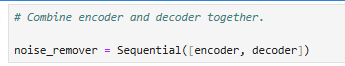

In [61]:
noise_remover = Sequential([encoder, decoder])

In [62]:
# Your code to print the Autoencoder model

#
noise_remover.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 64)                243648    
                                                                 
 sequential_11 (Sequential)  (None, 28, 28)            244368    
                                                                 
Total params: 488,016
Trainable params: 486,480
Non-trainable params: 1,536
_________________________________________________________________


In [ ]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier

# noise_remover.compile( ................  )
noise_remover.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


In [65]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

# history_2 = ..........................

history2 = noise_remover.fit(X_train, X_train, epochs=20, validation_data=[X_test, X_test])

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.6531 - accuracy: 0.0650 - val_loss: 0.4825 - val_accuracy: 0.1167
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3160 - accuracy: 0.1208 - val_loss: 0.2260 - val_accuracy: 0.1409
Epoch 3/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2179 - accuracy: 0.1378 - val_loss: 0.1956 - val_accuracy: 0.1568
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1999 - accuracy: 0.1484 - val_loss: 0.1825 - val_accuracy: 0.1662
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1904 - accuracy: 0.1557 - val_loss: 0.1741 - val_accuracy: 0.1735
Epoch 6/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1838 - accuracy: 0.1623 - val_loss: 0.1675 - val_accuracy: 0.1802
Epoch 7/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1785 - accuracy: 0.1685 - val_loss: 0.1621 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.1332 - loss: 0.2187 - val_accuracy: 0.2117 - val_loss: 0.1395
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2224 - loss: 0.1391 - val_accuracy: 0.2359 - val_loss: 0.1271
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2384 - loss: 0.1277 - val_accuracy: 0.2476 - val_loss: 0.1192
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2482 - loss: 0.1217 - val_accuracy: 0.2563 - val_loss: 0.1146
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2553 - loss: 0.1174 - val_accuracy: 0.2617 - val_loss: 0.1124
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2578 - loss: 0.1149 - val_accuracy: 0.2522 - val_loss: 0.1105
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2612 - loss: 0.1129 - val_accuracy: 0.2681 - val_loss: 0.1079
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2652 -

In [ ]:
# Hint: Use (copy and modify) the code from the cells above

___________________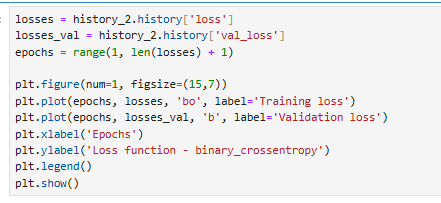

In [ ]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, loss, 'bo', label='Loss functions (Binary Crossentropy)')
plt.plot(epochs, val_loss, 'b', markeredgecolor='red', markerfacecolor='yellow', label='Validation loss function')
plt.xlabel('Epochs', size= 18)
plt.ylabel('Loss function', size=18)
plt.legend()

plt.show()

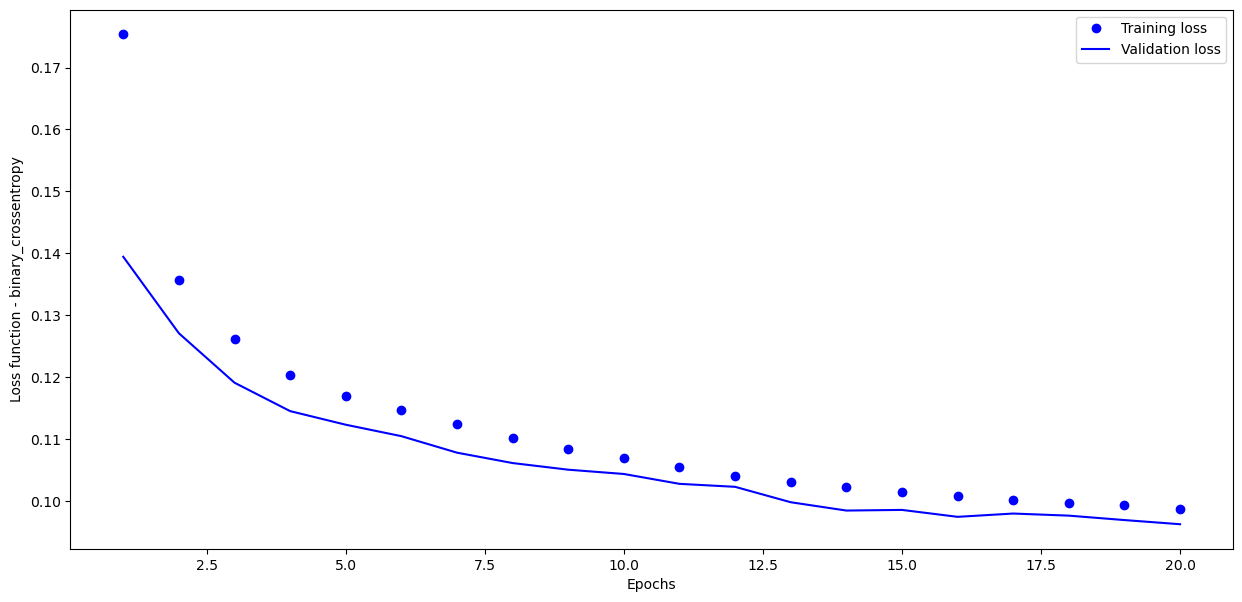

___________________________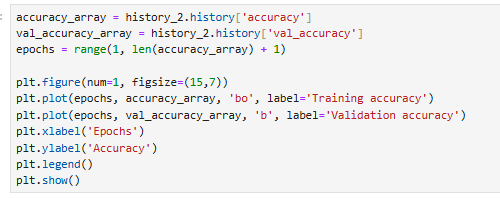

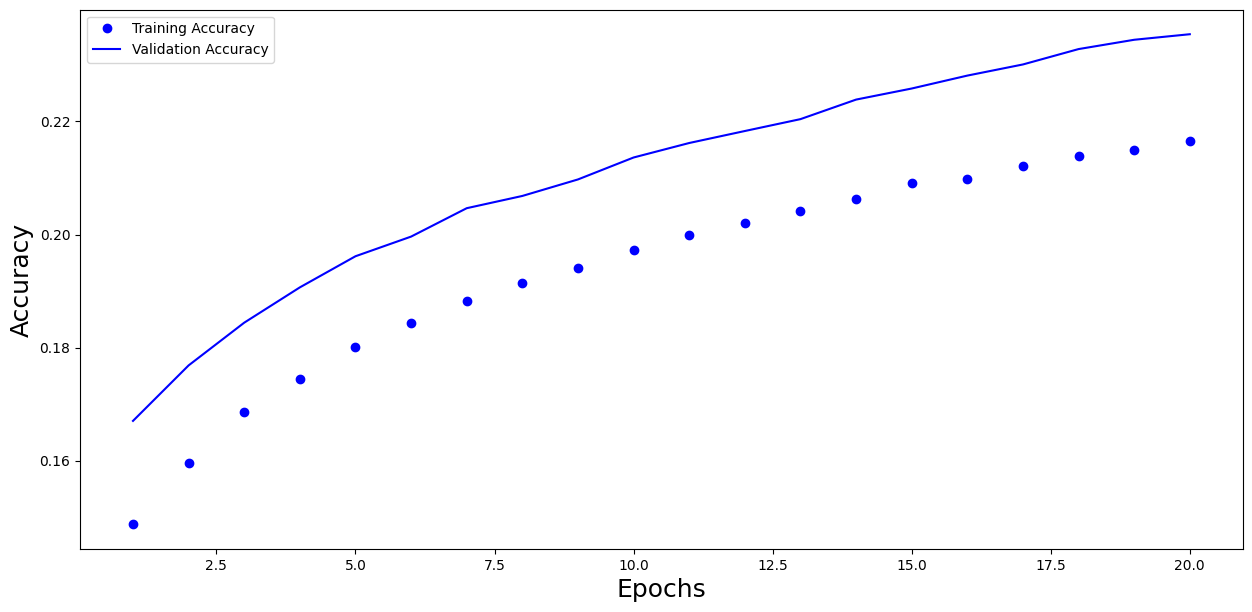

In [66]:
acc_values = history_dict['accuracy'][:]
val_acc_values = history_dict['val_accuracy'][:]
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', markeredgecolor='green', markerfacecolor='yellow', label='Validation Accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()

plt.show()

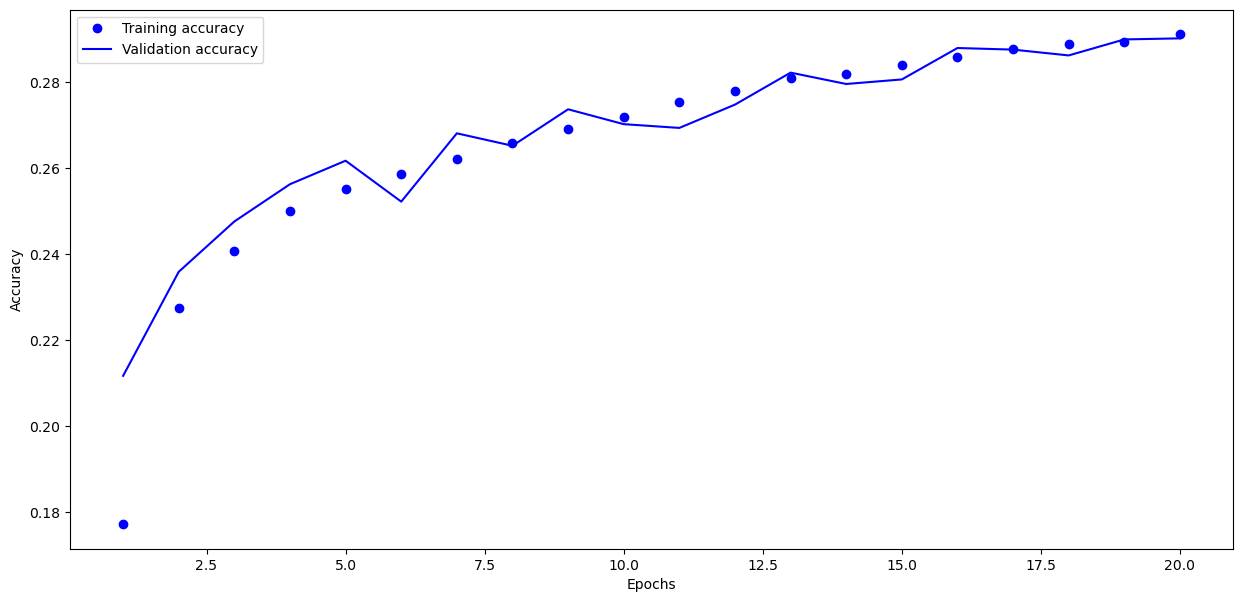

______________________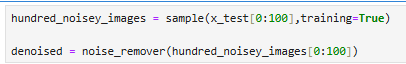

In [67]:
hundred_noisey_images = sample(X_test[:100], training=True)
denoised = noise_remover(hundred_noisey_images[:100])

______________________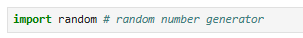

In [ ]:
import random

_______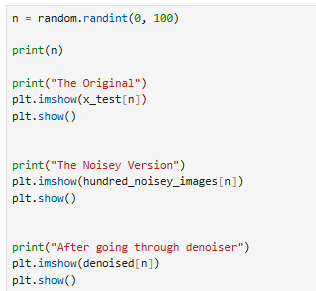

In [68]:
n = random.randint(0, 100)
print(n)

print("The Original")
plt.imshow(X_test[n])
plt.show()

print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()

print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

NameError: name 'random' is not defined

56
The Original


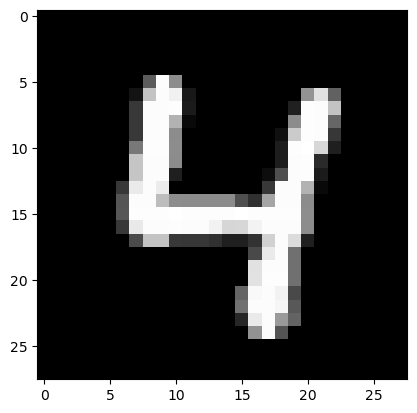

The Noisey Version


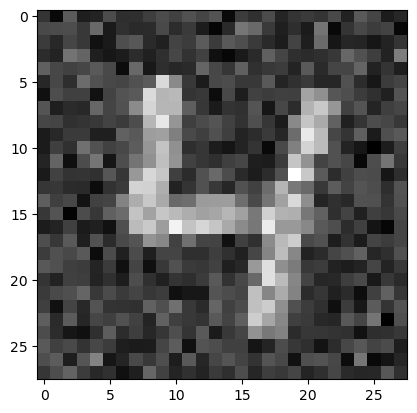

After going through denoiser


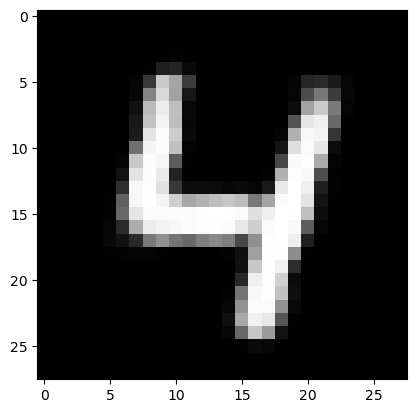

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.